In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    dim = None
    (h, w) = image.shape[:2]

    if width is None and height is None:
        return image

    if width is None:
        r = height / float(h)
        dim = (int(w * r), height)
    else:
        r = width / float(w)
        dim = (width, int(h * r))

    resized = cv2.resize(image, dim, interpolation = inter)

    return resized

def map_points(points):
    points = points.reshape((4,2))
    p_new = np.zeros((4,2),dtype = np.float32)

    add = points.sum(1)
    p_new[0] = points[np.argmin(add)]
    p_new[2] = points[np.argmax(add)]

    diff = np.diff(points,axis = 1)
    p_new[1] = points[np.argmin(diff)]
    p_new[3] = points[np.argmax(diff)]

    return p_new

In [ ]:
image = cv2.imread("/content/p_sheet2.jpeg")
image = image_resize(image, 512, 512)
orig = image.copy()

gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray,(5,5),0)

edged = cv2.Canny(blurred,30,50)

contours,hierarchy = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

contours = sorted(contours,key = cv2.contourArea, reverse = True)

for c in contours:
    p=cv2.arcLength(c,True)
    approx=cv2.approxPolyDP(c,0.02*p,True)

    if len(approx) == 4:
        target = approx
        break
approx = map_points(target)

output_dim = np.float32([[0,0],[512,0],[512,512],[0,512]])

transform_matrix = cv2.getPerspectiveTransform(approx, output_dim)
output = cv2.warpPerspective(orig, transform_matrix, (512,512))

new_img = cv2.cvtColor(output, cv2.COLOR_BGR2GRAY)

_, threshold = cv2.threshold(new_img, 127, 255, cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(new_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

plt.imshow(threshold, cmap="gray")

NameError: ignored

(0, 0)
(248, 248)
(109, 96)
[(0, 0), (248, 248), (109, 96)]
distance = 205.9732992404598


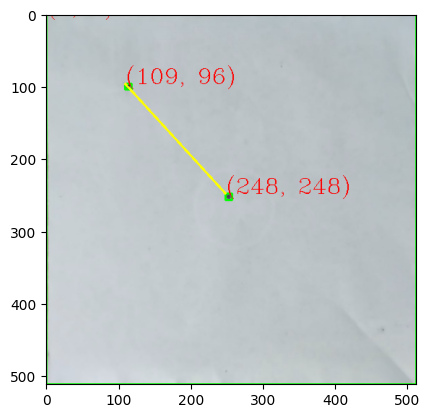

In [ ]:
contours, hierarchy = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
font = cv2.FONT_HERSHEY_COMPLEX
points = []
for c in contours:
        # if cv2.contourArea(c) <= 50 :
        #     continue
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255,0), 2)
        string = "(" + str(x) + ", " + str(y) + ")"
        center = (x,y)
        cv2.putText(output, string, (x, y), font, 1, (255, 0, 0))
        print (center)
        points.append(center)

print(points)
cv2.line(output,points[1],points[2],(255,255,0),2)
print(f"distance = {math.dist(points[1], points[2])}")
plt.imshow(output)